# Data Science Topic Trends
___Request___: Find the best data science topic(s) to create content/media about.  
___Data source___: The data is from the [Data Science Stack Exchange Data Explorer](http://data.stackexchange.com/datascience).  
___Additional info___: The time range on the dataset is from 01/01/2019 through 02/06/2021.  
Here is the SQL query for the data:
```
SELECT Id,
       CreationDate,
       Score,
       ViewCount,
       Tags,
       AnswerCount,
       FavoriteCount
FROM posts
WHERE CreationDate > '2019-01-01';
```
The primary avenue for investigation is through the Tags and Views of each post.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
%matplotlib inline
qs = pd.read_csv('2019_questions.csv', parse_dates=['CreationDate'])
qas = pd.read_csv('QandAs_2019.csv', parse_dates=['CreationDate'])

In [2]:
qs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  1407 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


In [3]:
qs['Tags'] = qs['Tags'].str.replace('<','').str.replace('>', ',').str.rstrip(',')
qs['Tags'] = qs['Tags'].str.split(',')

qas['Tags'] = qas['Tags'].str.replace('<','').str.replace('>', ',').str.rstrip(',')

In [4]:
qs.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"[machine-learning, data-mining]",0,NaN
1,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,NaN
2,44423,2019-01-23 09:58:41,2,1651,"[python, time-series, forecast, forecasting]",0,NaN
3,44427,2019-01-23 10:57:09,0,55,"[machine-learning, scikit-learn, pca]",1,NaN
4,44428,2019-01-23 11:02:15,0,19,"[dataset, bigdata, data, speech-to-text]",0,NaN


In [5]:
qas['Tags'] = qas['Tags'].str.split(',')
qas.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,55644,2019-07-14 13:51:15,1,NaN,NaN,NaN,NaN
1,55645,2019-07-14 14:05:51,0,124.0,"[python, logistic-regression]",0.0,1.0
2,55646,2019-07-14 14:06:13,0,27.0,"[machine-learning, multiclass-classification, ...",0.0,NaN
3,55647,2019-07-14 14:37:51,6,907.0,"[machine-learning, neural-network, deep-learni...",1.0,1.0
4,55648,2019-07-14 14:43:53,3,1533.0,"[machine-learning, python, feature-engineering...",1.0,2.0


In [6]:
tag_counts = dict()
def count_tags(tag_list):
    if isinstance(tag_list, float):
        return
    for tag in tag_list:
        if tag in tag_counts:
            tag_counts[tag] += 1
        else:
            tag_counts[tag] = 1
            
qas['Tags'].apply(count_tags)
tag_counts = pd.DataFrame.from_dict(tag_counts, orient='index')
tag_counts.rename(columns={0:'tag_count_qas'}, inplace=True)
tag_counts = tag_counts.sort_values('tag_count_qas')
#tag_counts['rank'] = tag_counts['tag_count_qas'].rank(ascending=False)
tag_qas_20 = tag_counts.tail(20)

In [7]:
tag_counts.tail(20)

,tag_count_qas
feature-selection,384
r,436
predictive-modeling,436
statistics,453
clustering,505
dataset,596
pandas,621
lstm,631
regression,657
time-series,773


In [8]:
tag_count2 = dict()
def count_tags(tag_list):
    if isinstance(tag_list, float):
        return
    for tag in tag_list:
        if tag in tag_count2:
            tag_count2[tag] += 1
        else:
            tag_count2[tag] = 1
            
qs['Tags'].apply(count_tags)
tag_counts_qs = pd.DataFrame.from_dict(tag_count2, orient='index')
tag_counts_qs.rename(columns={0:'tag_count_qs'}, inplace=True)
tag_counts_qs = tag_counts_qs.sort_values('tag_count_qs')
#tag_counts_qs['rank'] = tag_counts_qs['tag_count_qs'].rank(ascending=False)
tag_qs_20 = tag_counts_qs.tail(20)

In [9]:
tag_counts_qs.tail(20)

,tag_count_qs
machine-learning-model,224
statistics,234
clustering,257
predictive-modeling,265
r,268
dataset,340
regression,347
pandas,354
lstm,402
time-series,466


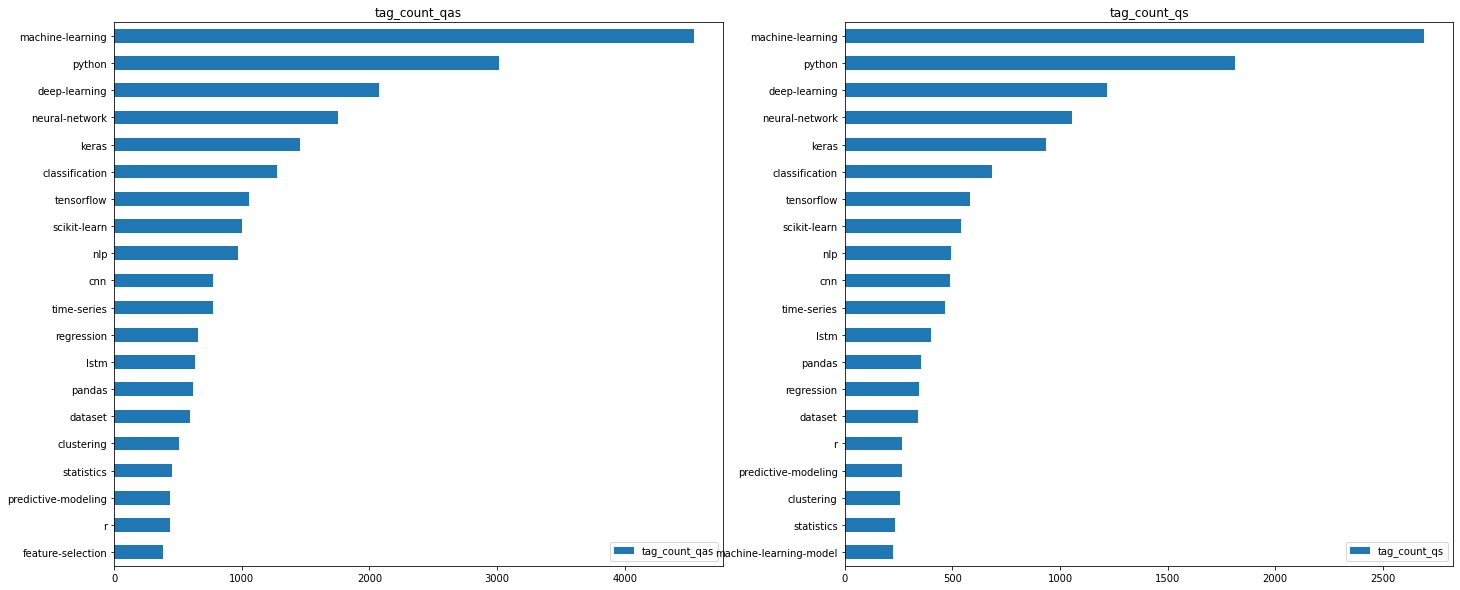

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24,10))
tag_qas_20.plot(kind='barh', ax=axes[0], subplots=True)
tag_qs_20.plot(kind='barh', ax=axes[1], subplots=True);

## 2019-2021 (Jan) vs only 2019
The two graphs above show the top 15 tags based off of usage count (i.e. how many posts have the tag associated with the post). The top 11 haven't changed with the additional year, however beyond that there is some variation. Clearly machine-learning and python have a considerable lead above the rest. Now lets compare the tags to the number of times a post was viewed and see if there are any differences. For simplicity, we will just look at the larger dataset (spans 2019 through Jan. 2021)

In [11]:
t_view_count = dict()
for index, row in qas.iterrows():
    if isinstance(row['Tags'], float):
            continue
    for tag in row['Tags']:
        if tag in t_view_count:
            t_view_count[tag] += row['ViewCount']
        else:
            t_view_count[tag] = row['ViewCount']
        

tag_views = pd.DataFrame.from_dict(t_view_count, orient='index')
tag_views.rename(columns={0:'tag_view_counts'}, inplace=True)
tag_views = tag_views.sort_values('tag_view_counts')
tag_views_20 = tag_views.tail(20)

In [12]:
combined = pd.merge(tag_views_20, tag_qas_20, how='right', left_index=True, right_index=True)
combined.rename(columns={'tag_view_counts': 'view_counts', 'tag_count_qas': 'use_counts'}, inplace=True)
combined = combined.sort_values('view_counts', ascending=False)
combined['view_rank'] = combined['view_counts'].rank(ascending=False)
combined['use_rank'] = combined['use_counts'].rank(ascending=False)
combined = combined.dropna()
combined.head(3)

,view_counts,use_counts,view_rank,use_rank
python,2140166.0,3011,1.0,2.0
machine-learning,1488588.0,4542,2.0,1.0
pandas,966243.0,621,3.0,14.0


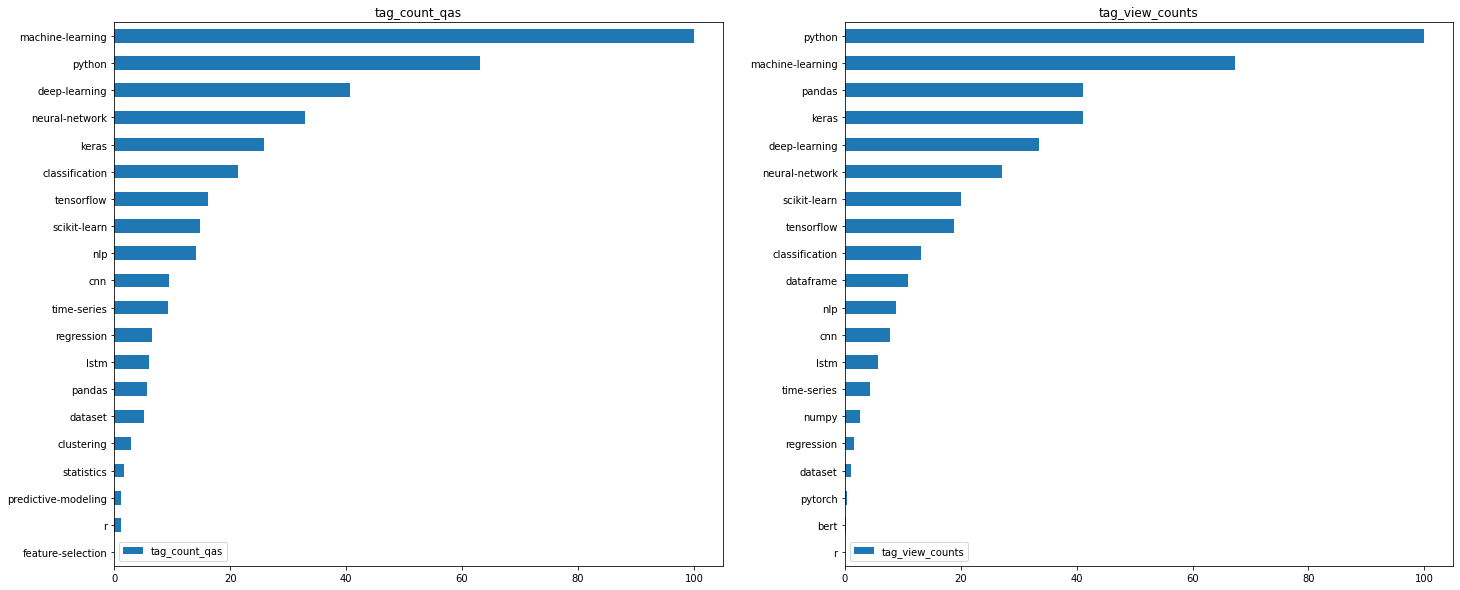

In [13]:
norm_tag_count = ((tag_qas_20 - tag_qas_20.min()) / (tag_qas_20.max() - tag_qas_20.min()) * 100)
norm_tag_view = ((tag_views_20 - tag_views_20.min()) / (tag_views_20.max() - tag_views_20.min()) * 100)

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24,10))
norm_tag_count.plot(kind='barh', ax=axes[0], subplots=True)
norm_tag_view.plot(kind='barh', ax=axes[1], subplots=True);

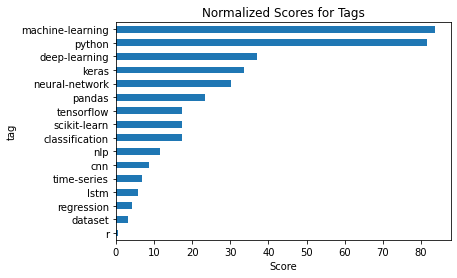

In [14]:
# split the 2 parts of the scoring equation to potentially allow me to figure out what to do with the NaN vals
tag_score_count_half = (0.5 * norm_tag_count['tag_count_qas'])
tag_score_view_half = (0.5 * norm_tag_view['tag_view_counts'])
tag_score2 = tag_score_count_half + tag_score_view_half
# However, after reflecting on the comment above I realized it wouldn't have any intrinsic value on our analysis
tag_score2 = tag_score2.dropna().sort_values()

tag_score_plot = tag_score2.plot(kind='barh')
tag_score_plot.set(title='Normalized Scores for Tags', xlabel='Score', ylabel='tag');

# Info on the 3 graphs above
In order to compare the number of times a tag was attributed to a post (any variables with `*count*`) with the number of times a post with that a post with that tag was viewed (any variables with `*view*`) the 2 values had to be normalized. Essentially the number of views is so much higher it is impossible to create a balanced scoring system (as the use counts would have no impact on the score).  
  
With the normalized values we then can calculate a basic score based off the equation:
```
score = (1/2 * counts) + (1/2 * views)
# resulting in half of the total score coming from each element (counts, and views)
```
As you can see machine-learning & python are by far the most common tag used and the most common viewed. Being that those are relatively commonplace in the data science world this doesn't come with much surprise. Machine-learning is a general topic and python is a main coding language for implementing that topic.  
  
Needless to say the best topics to create content for will certainly involve one or both of those. Branching from that are the 3rd and 4th ranked tags `deep-learning` and `keras` which ironically align as sub-components of the top 2 tags. `deep-learning :: machine-learning as keras :: python` (not exactly but there is a commonality between the 2 sets). Lets look and see if the popularity of any of these are is rising or falling.  
### Tags popularity over time

In [21]:
import datetime as dt

def get_monthyear(post_date):
    month = int(post_date[5:7])
    year = int(post_date[:4])*100
    return month + year
trends = qas.copy()
trends['month'] = trends['CreationDate'].astype(str).apply(get_monthyear)
# creates a month column with the format of YYYYmm as an integer

In [22]:
trends = trends.drop(columns=['AnswerCount', 'FavoriteCount', 'Score'])  # dropping the columns we don't really need

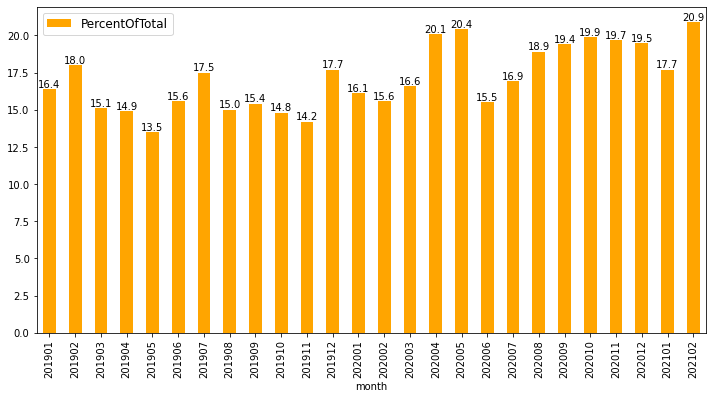

In [20]:
# Lets count the tags, calculate the percentage of total posts, and graph the results
trends['Tags'] = trends['Tags'].dropna()
def dl_counts(tags):
    dl_tags = ['deep-learning', 'kera', 'cnn', 'neural-network', 'scikit-learn', 'tensorflow']
    if isinstance(tags, list):
        for tag in tags:
            if tag in dl_tags:
                return 1
    return 0

trends['deep_learning'] = trends['Tags'].apply(dl_counts)
monthly = trends.groupby('month').agg({'deep_learning': ['sum', 'size']})
monthly.columns = ['DeepLearning', 'TotalQuestions']
monthly.reset_index(inplace=True)
monthly['PercentOfTotal'] = round((monthly['DeepLearning'] / monthly['TotalQuestions'])*100, 1)

ax1 = monthly.plot(x='month', y='PercentOfTotal', kind='bar', color='orange', figsize=(12,6))

for idx, t in monthly['PercentOfTotal'].iteritems():
    ax1.text(idx, t, str(t), ha="center", va="bottom")
handles1, labels1 = ax1.get_legend_handles_labels()
ax1.legend(handles=handles1,
           labels=labels1,
           loc="upper left", prop={"size": 12})

# Final Result...Deep Learning
It appears that deep learning is the most common subtopic that doesn't appear to be just a fad. Ignoring 2/2021 (only 6 days are accounted for), deep learning related topics do not appear to be moving out of the 15-20% range of total posts on Stack Exchange Data Science. Which means it isn't just a passing fad.  
As we found from earlier machine-learning and python are the top 2 so creating content related to deep learning with a heavy python focus would greatly serve the data science community.